In [1]:
import os
import numpy as np
import mvpa2
from mvpa2.suite import *

bold_fname = os.path.join('..', 'data', 'qub', '4Dw.nii')
mask_fname = os.path.join('..', 'data', 'qub', 'struct', 'final_mask_w.hdr')
ds = fmri_dataset(bold_fname, mask=mask_fname)
ds.shape

E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1502: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, varkw, defaults = inspect.getargspec(jac.__init__)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:636: DeprecationWarning:

 * Please note: warnings are printed only once, but underlying problem might occur many times *


E:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\datasets\sources\skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\pandas\__init__.py:7: Depre

E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)


(1351, 65159)

In [2]:
len(ds.samples[0])

65159

In [3]:
for value in ds[1].samples:
    print(value)

[32 28 29 ..., 11 11 11]


In [4]:
len(ds.samples[0])

65159

In [5]:
len(ds[:, 1].samples)

1351

In [30]:
import numpy as np

#lets compute the average
mean_results = []

range_max = ds.nfeatures
#range_max = 1000

#ds.nfeatures
for num in range(0, range_max):
    mean_results.insert(num, np.mean(ds[:, num].samples))
    
#remove
#for num in range(1000, ds.nfeatures):
#    mean_results.insert(num, 0)

print("done")

done


In [31]:
#check our size is correct
len(mean_results)

65159

In [32]:
np.amax(mean_results)

985.01110288675056

In [33]:
for i, s in enumerate(mean_results):
    mean_results[i] = int(s)

In [34]:
mean_matrix = np.reshape(mean_results,(-1,len(mean_results)))

In [35]:
mean_matrix

array([[30, 28, 31, ..., 10, 11, 10]])

In [75]:
result_ds = Dataset(mean_matrix)
result_ds.shape

(1, 65159)

In [76]:
overlay_data = map2nifti(ds, result_ds)

In [77]:
overlay_data.to_filename('mytest.nii.gz')

In [78]:
new_ds = fmri_dataset(overlay_data, mask=mask_fname)
new_ds.shape

(1, 65159)

In [83]:
from nilearn.image import resample_img
from nilearn import image
import nibabel
import os

image_to_resample = nibabel.load(os.path.join('..', 'data', 'qub', 'struct', 'cos005a1001.hdr'))
bold_data_sample = image.index_img(bold_fname, 0)
resampled_background = resample_img(image_to_resample,target_affine = bold_data_sample.get_affine(), target_shape=bold_data_sample.shape)

In [87]:
resampled_background.to_filename('resized_anatomy')

In [84]:
mri_args = {
    'background' : resampled_background,
    'cmap_bg' : 'gray',
    'cmap_overlay' : 'autumn', # YlOrRd_r # pl.cm.autumn
    'interactive' : cfg.getboolean('examples', 'interactive', True),
    }

E:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


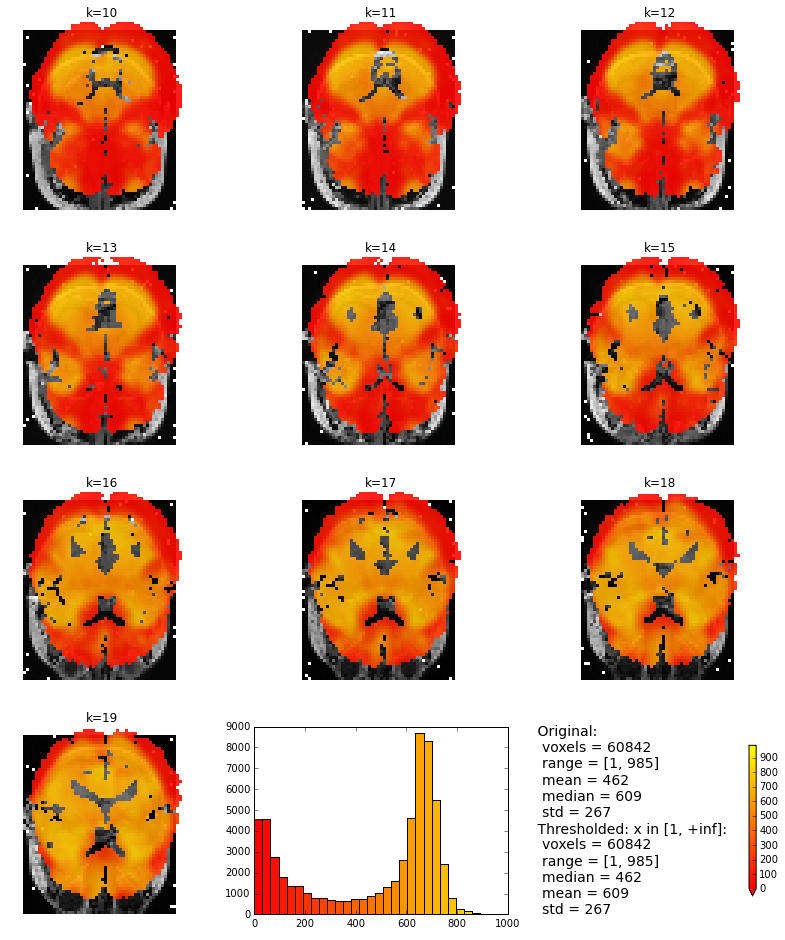

In [85]:
%matplotlib inline

fig = plot_lightbox(overlay=overlay_data, vlim=(0, None), slices=range(10,20), **mri_args)

E:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


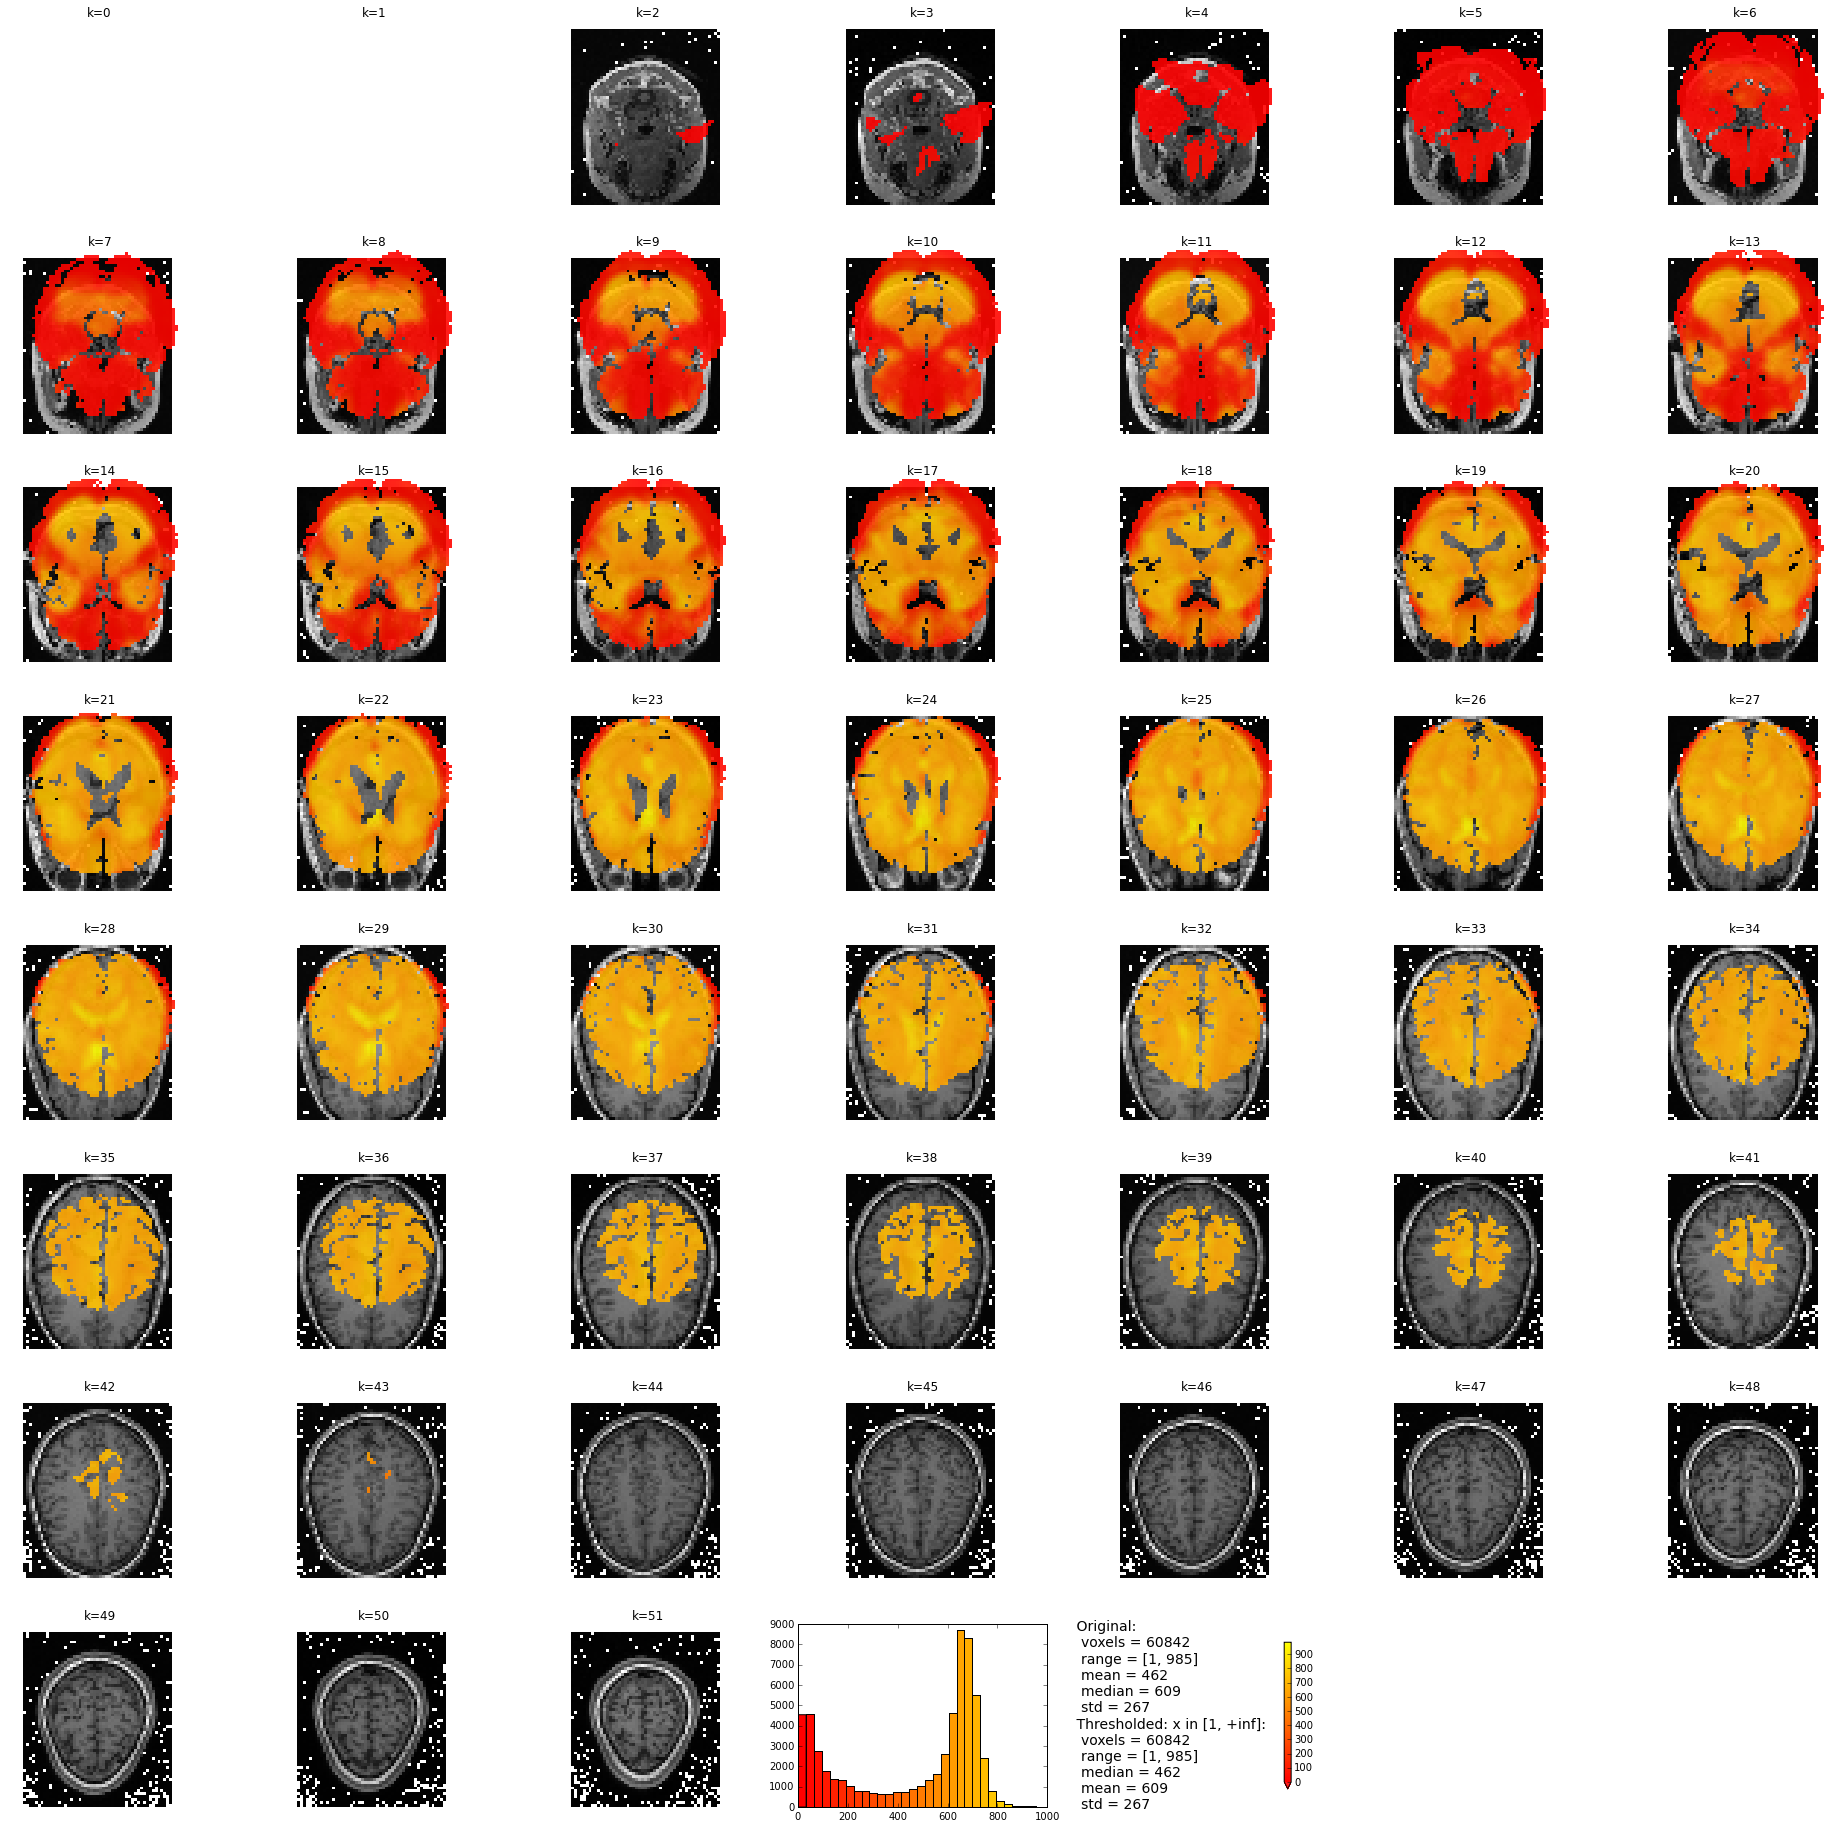

In [86]:
from brainCorrelationPlotter import plot_lightbox

fig = plot_lightbox(overlay=overlay_data, **mri_args)

In [99]:
overlay_data.shape

(53, 63, 52, 1)

In [100]:
ds.shape

(1351, 65159)

In [88]:
ds.data

AttributeError: 'Dataset' object has no attribute 'data'

In [93]:
file = os.path.join('mytest.nii.gz')

temp_ds = fmri_dataset(file)

temp_ds.shape

(1, 173628)

E:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


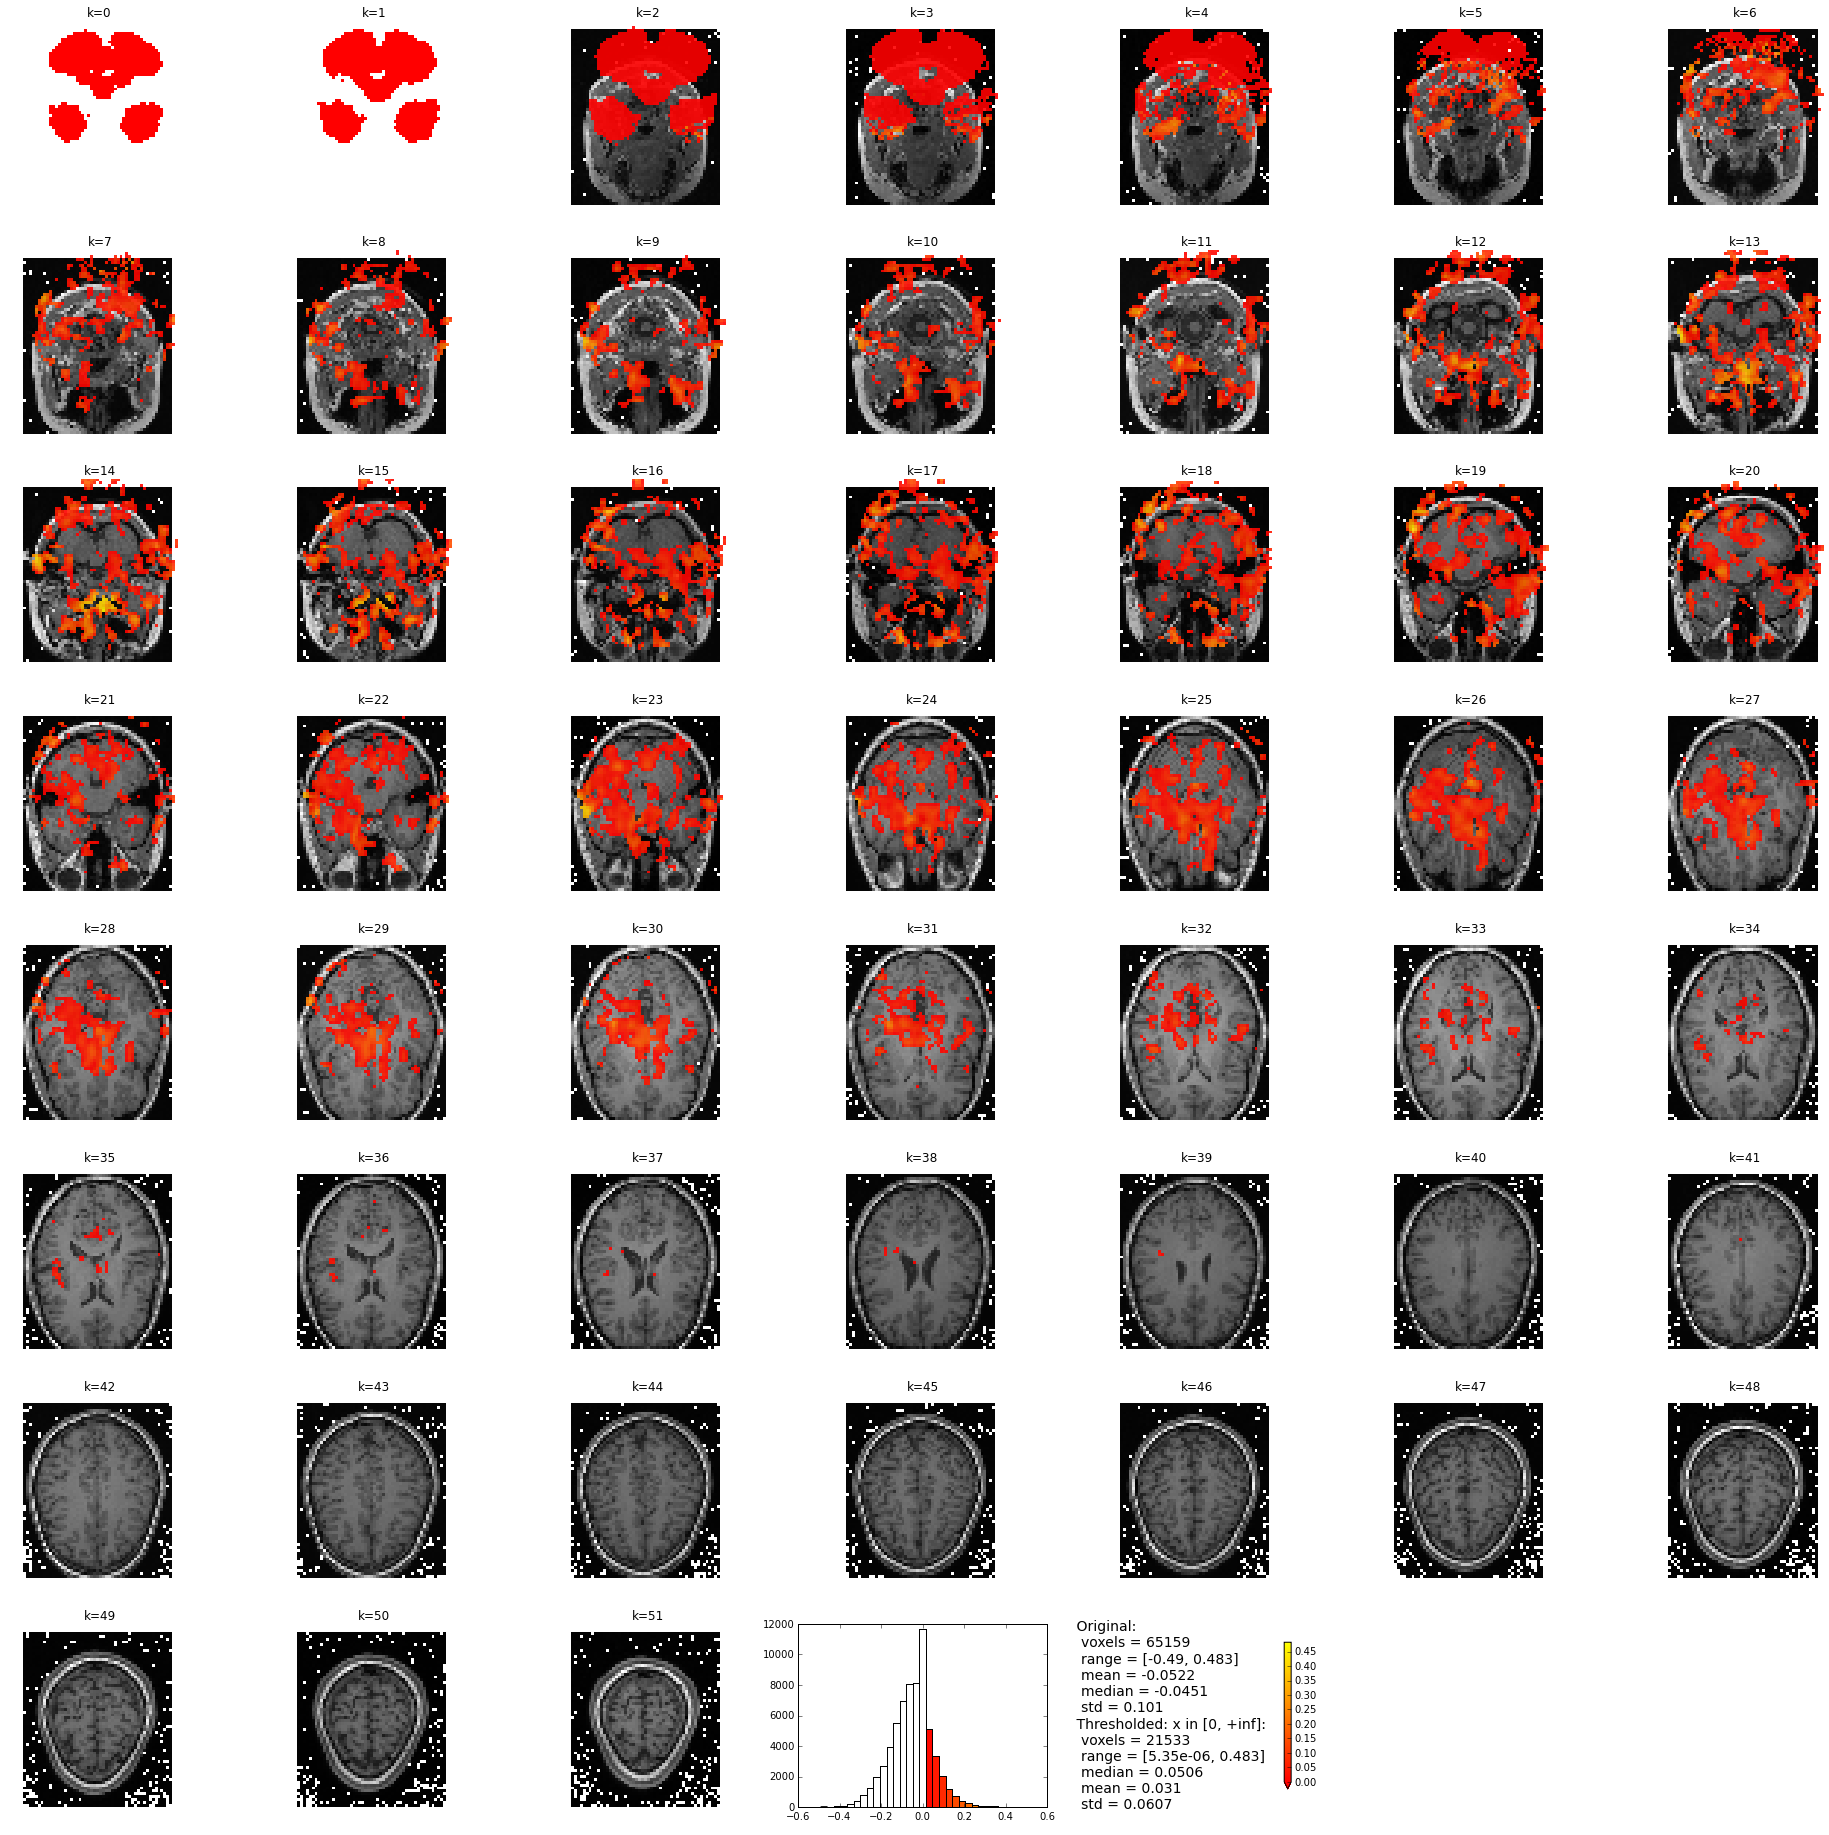

In [102]:
image_to_resample = nibabel.load(os.path.join('..', 'data', 'qub', 'struct', 'cos005a1001.hdr'))
image_to_use_for_sample = image.index_img(bold_fname, 0)
resampled_background = resample_img(image_to_resample,target_affine = image_to_use_for_sample.get_affine(), target_shape=image_to_use_for_sample.shape)

mri_args = {
    'background' : resampled_background,
    'cmap_bg' : 'gray',
    'overlay_mask': mask_fname,
    'cmap_overlay' : 'autumn', # YlOrRd_r # pl.cm.autumn
    'interactive' : cfg.getboolean('examples', 'interactive', True),
    }

fig = plot_lightbox(overlay=file, **mri_args)